### ***Day1 Practice:1***

In [ ]:
import os
import sys
import pandas as pd

def load_csv(filename):
    path=os.path.join(sys.path[0],filename)
    if not os.path.exists(path):
        print("Error")
    return pd.read_csv(path)

def main():
    fname=input()
    df=load_csv(fname)
    
    print("First 5 rows of the dataset:")
    print(df.head())

    print("\nNumber of samples in the data:")
    print(len(df))
    
    print("\nData types of each column:")
    print(df.dtypes)
    
    features = [
        'satisfaction_level',
        'last_evaluation',
        'number_project',
        'average_montly_hours',
        'time_spend_company',
        'Work_accident',
        'promotion_last_5years'
    ]
    print("\nFeature columns used for classification:")
    print(features)

    print("\nStatistical summary of numeric columns:")
    print(df.describe())
    
    categorical_cols = ['Department', 'salary', 'left']

    if all(col in df.columns for col in categorical_cols):
        print("\nSample categorical data (Department, salary, left):")
        print(df[categorical_cols].head())
    else:
        print("\nCategorical columns ('Department', 'salary', 'left') not found in dataset.")
    
main()

### ***Day1 Practice:2***

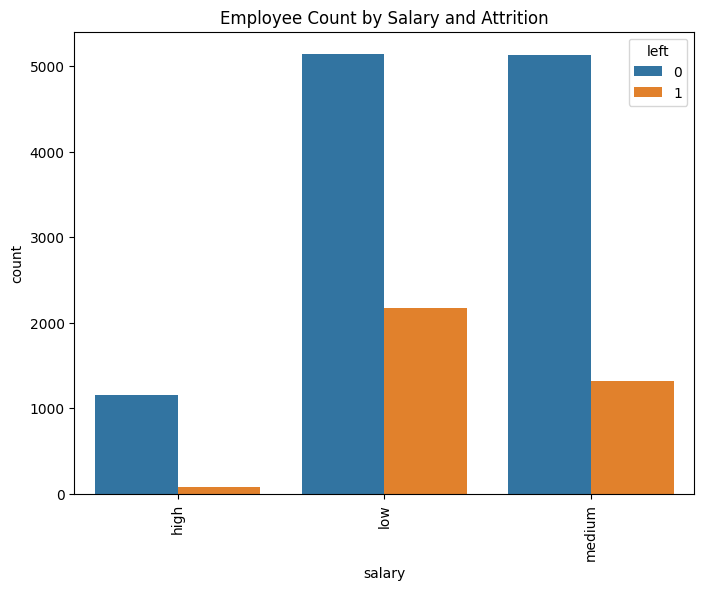

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(
    r"C:\Users\HP\OneDrive\Desktop\AIML_NOTES\dataset\ML470_S1_HR_Data_Practice.xlsx"
)

plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x='salary',
    hue='left',
    order=['high', 'low', 'medium']
)

plt.xlabel('salary')
plt.ylabel('count')
plt.title('Employee Count by Salary and Attrition')
plt.xticks(rotation=90)
plt.show()


### ***Day1 Practice:3***

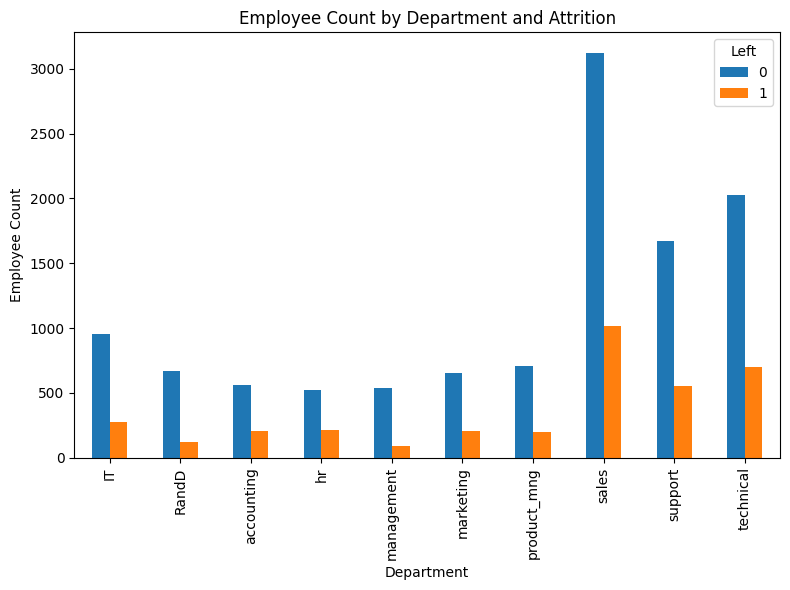

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel(
    r"C:\Users\HP\OneDrive\Desktop\AIML_NOTES\dataset\ML470_S1_HR_Data_Practice.xlsx"
)

counts = df.groupby(['Department', 'left']).size().unstack(fill_value=0)

counts.plot(
    kind='bar',
    figsize=(8, 6)
)

plt.xlabel('Department')
plt.ylabel('Employee Count')
plt.title('Employee Count by Department and Attrition')
plt.xticks(rotation=90)
plt.legend(title='Left')
plt.tight_layout()
plt.show()


### ***Day1 Practice:4***

In [ ]:
import os
import sys
import pandas as pd

def load_csv(filename):
    path=os.path.join(sys.path[0],filename)
    if not os.path.exists(path):
        print(f"Error: File '{filename}' not found.")
    return pd.read_csv(path)

def main():
    fname=input()
    df=load_csv(fname)
    
    print("Rows with missing values (if any):")
    missing_rows=df[df.isnull().any(axis=1)]
    
    if missing_rows.empty:
        print("No missing values found in the dataset.")
        print()
    else:
        print(df[df.isnull().any(axis=1)])
        
    print("\nCorrelation matrix of numeric columns:")
    print(df.select_dtypes(include=['number']).corr())
main()

### ***Day1 Practice:5***

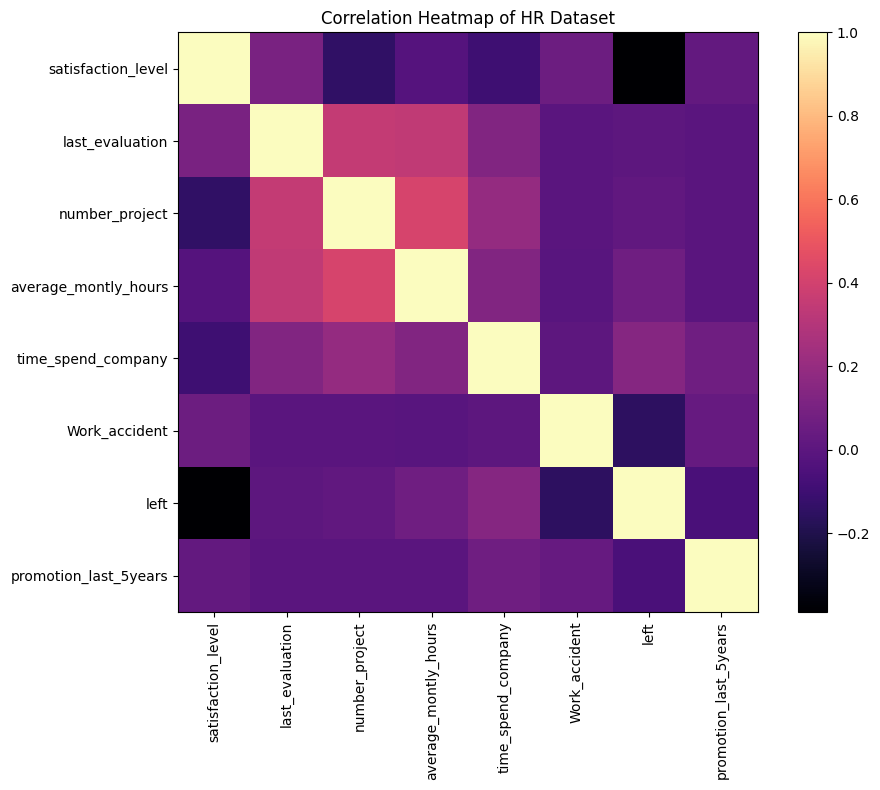

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel file
df = pd.read_excel(
    r"C:\Users\HP\OneDrive\Desktop\AIML_NOTES\dataset\ML470_S1_HR_Data_Practice.xlsx"
)

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='magma')
plt.colorbar()

# Axis labels
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Heatmap of HR Dataset")
plt.tight_layout()
plt.show()


### ***Day1 Practice:6***

In [ ]:
import os 
import sys
import pandas as pd
from sklearn.model_selection import train_test_split

def load_csv(filename):
    path=os.path.join(sys.path[0],filename)
    if not os.path.exists(path):
        print("Error")
    return pd.read_csv(path)
    
def main():
    fname=input()
    df=load_csv(fname)
    
    salary_dummies=pd.get_dummies(df['salary'],prefix='salary')
    df_salary=pd.concat([df,salary_dummies],axis=1)
    
    print("Creating dummy variables for salary:")
    print(df_salary.head())
    
    dept_dummies=pd.get_dummies(df['Department'],prefix='dept')
    df_final=pd.concat([df_salary,dept_dummies],axis=1)
    
    print("\nCreating dummy variables for department:")
    print(df_final.head())
    
    print("\nFinal dataframe with dummy variables:")
    print(df_final.head())
    
    
    train_df,test_df=train_test_split(df_final,train_size=0.7)
    print("Size of training dataset:",train_df.shape)
    print("Size of test dataset:",test_df.shape)
    
    X_train=train_df.drop(columns='left',axis=1)
    y_train=train_df['left']
    
    X_test=test_df.drop(columns='left',axis=1)
    y_test=test_df['left']
    
    print("\nShapes of input/output features after train-test split:")
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
main()

### ***Day1 Practice:7***

In [ ]:
import os 
import sys
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

def load_csv(filename):
    path=os.path.join(sys.path[0],filename)
    if not os.path.exists(path):
        print("Error")
    return pd.read_csv(path)
    

fname=input()
df=load_csv(fname)

salary_dummies=pd.get_dummies(df['salary'],prefix='salary')
dept_dummies=pd.get_dummies(df['Department'],prefix='dept')

df_encoded=pd.concat([df,salary_dummies,dept_dummies],axis=1)

df_encoded = df_encoded.drop(columns=['salary', 'Department'])

X=df_encoded.drop(columns='left')
y=df_encoded['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

model=GaussianNB()
model.fit(X_train,y_train)

print(model)
print()

predictions=model.predict(X_test)

print(predictions)

### ***Day1 Practice:8***

#### ***ML_Modules.py***

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

def evaluate_classifier(y_test, y_pred):
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred))
    print("===================")

    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=2))
    print("===================")

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    precision = report['weighted avg']['precision']

    print(f"accuracy: {acc:.3f}")
    print(f"recall: {recall:.3f}")
    print(f"f1-score: {f1:.3f}")
    print(f"precision: {precision:.3f}")

def auc_roc(classifier, X_test, y_test):
    y_prob = classifier.predict_proba(X_test)[:, 1]
    return roc_auc_score(y_test, y_prob)

#### ***Main.py***

In [ ]:
import os
import sys
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import ML_Modules

def load_csv(filename):
    path = os.path.join(sys.path[0], filename)
    if not os.path.exists(path):
        print(f"Error: File '{filename}' not found.")
        sys.exit()
    return pd.read_csv(path)

filename = input().strip()

df = load_csv(filename)

salary_dummies = pd.get_dummies(df['salary'], prefix='salary')
dept_dummies = pd.get_dummies(df['Department'], prefix='dept')

df_encoded = pd.concat([df, salary_dummies, dept_dummies], axis=1)
df_encoded = df_encoded.drop(columns=['salary', 'Department'])

X = df_encoded.drop(columns='left')
y = df_encoded['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

ML_Modules.evaluate_classifier(y_test, y_pred)

print("code is available inside the 'ML_Modules.py' file")

### ***Day1 Practice:9***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score

# -----------------------------------
# Load dataset
# -----------------------------------
df = pd.read_excel(
    r"C:\Users\HP\OneDrive\Desktop\AIML_NOTES\dataset\ML470_S1_HR_Data_Practice.xlsx"
)

# -----------------------------------
# Encode categorical variables
# -----------------------------------
salary_dummies = pd.get_dummies(df['salary'], prefix='salary')
dept_dummies = pd.get_dummies(df['Department'], prefix='dept')

df_encoded = pd.concat([df, salary_dummies, dept_dummies], axis=1)
df_encoded.drop(columns=['salary', 'Department'], inplace=True)

# -----------------------------------
# Split features and target
# -----------------------------------
X = df_encoded.drop(columns='left')
y = df_encoded['left']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7
)

# -----------------------------------
# Train Gaussian Naive Bayes
# -----------------------------------
model = GaussianNB()
model.fit(X_train, y_train)

# -----------------------------------
# Predict probabilities
# -----------------------------------
y_prob = model.predict_proba(X_test)[:, 1]

# -----------------------------------
# ROC Curve and AUC
# -----------------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# No-skill prediction (random guessing)
no_skill = [0 for _ in range(len(y_test))]
fpr_ns, tpr_ns, _ = roc_curve(y_test, no_skill)

# -----------------------------------
# Plot ROC Curve
# -----------------------------------
plt.figure()
plt.plot(fpr_ns, tpr_ns, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Naïve Bayes')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# -----------------------------------
# Print AUC scores
# -----------------------------------
print(f"No Skill: ROC AUC={roc_auc_score(y_test, no_skill):.3f}")
print(f"Classifier: ROC AUC={auc_score:.3f}")


### ***Day1 Concept:1***

#### ***Main.py***

In [ ]:
import os
import sys
import pandas as pd
import ML_Modules

def load_csv(filename):
    path = os.path.join(sys.path[0], filename)
    if not os.path.exists(path):
        print(f"Error: File '{filename}' not found.")
        sys.exit()
    return pd.read_csv(path)

filename = input().strip()

df = load_csv(filename)

print("Scenario 1: False positive rate = 5%")
ML_Modules.calc_probability(
    P_disease=0.001,
    P_positive_given_disease=0.95,
    P_positive_given_no_disease=0.05,
    P_no_disease=0.999
)
print()

print("Scenario 2: False positive rate = 10%")
ML_Modules.calc_probability(
    P_disease=0.001,
    P_positive_given_disease=0.95,
    P_positive_given_no_disease=0.10,
    P_no_disease=0.999
)

#### ***ML_Modules.py***

In [ ]:
def calc_probability(P_disease, P_positive_given_disease,
                     P_positive_given_no_disease, P_no_disease):

    denominator = (P_positive_given_disease * P_disease) + \
                  (P_positive_given_no_disease * P_no_disease)

    if denominator == 0:
        print("Invalid probability values.")
        return None

    posterior = (P_positive_given_disease * P_disease) / denominator

    print(f"Probability of having disease given a positive test: {posterior:.4f}")

    return posterior


### ***Day1 Concept:2***

#### ***Main.py***

In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import warnings

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import ML_Modules

warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

def load_csv(filename):
    path = os.path.join(sys.path[0], filename)
    if not os.path.exists(path):
        print(f"Error: File '{filename}' not found.")
        sys.exit()
    return pd.read_csv(path)
    
def main():
    
    file = input().strip()
    df = load_csv(file)
    print(df.head())
    print()
    print(df.dtypes)
    print()
    feature_cols = ['Glucose', 'BMI', 'Age', 'FamilyHistory', 'HbA1c']
    X = df[feature_cols]
    y = df['Outcome']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.67, random_state=42
    )

    model = GaussianNB()
    model.fit(X_train, y_train)

    print("Model trained.")
    print()
    
    y_pred = model.predict(X_test)
    print(f"Predicted Values:{repr(np.array(y_pred,dtype=int))}")
    print()

    ML_Modules.evaluate_classifier(y_test, y_pred)


if __name__ == "__main__":
    main()

#### ***ML_Modules.py***

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score

def evaluate_classifier(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix")
    print(cm)
    print("===================")

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    print(f"accuracy: {accuracy:.3f}")
    print(f"recall: {recall:.3f}")
    print(f"f1-score: {f1:.3f}")
    print(f"precision: {precision:.3f}")

### ***Day1 Concept:3***

#### ***Main.py***

In [ ]:
import os
import sys
import warnings
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

def main():
    file=input().strip()
    path=os.path.join(sys.path[0],file)
    
    try:
        df=pd.read_csv(path)
    except FileNotFoundError:
        print(f"Error: File '{file}' not found.")
        sys.exit()
        
    X_text=df['HealthText']
    y=df['Outcome']
    
    vectorizer=CountVectorizer()
    X= vectorizer.fit_transform(X_text)
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    clf=MultinomialNB()
    clf.fit(X_train,y_train)
    
    new_text=[
         "Age group: Senior | BMI status: Overweight | Glucose category: Very High Glucose Level"
         ]
         
    new_vector=vectorizer.transform(new_text)
    
    pred=clf.predict(new_vector)[0]
    
    print(f"Prediction: {pred}")
    
    
main()